In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Shampoo Sales

In [2]:
df_shampoo = pd.read_csv('shampoo.csv')
df_shampoo.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [3]:
df_shampoo.rename(columns={'Sales of shampoo over a three year period':'Sales'}, inplace=True)

In [4]:
df_shampoo.dropna(inplace=True)

In [5]:
df_shampoo_ix = df_shampoo.copy()
df_shampoo_ix = df_shampoo_ix.set_index('Month')

In [6]:
df_shampoo_ix

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3
1-06,168.5
1-07,231.8
1-08,224.5
1-09,192.8


<AxesSubplot:xlabel='Month'>

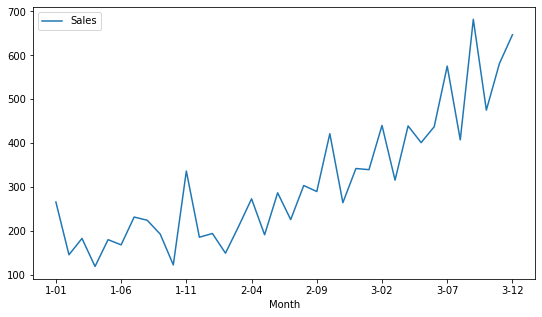

In [7]:
fig, ax = plt.subplots(figsize=(9,5))
df_shampoo_ix.plot(ax=ax)

In [8]:
df_shampoo.dtypes

Month     object
Sales    float64
dtype: object

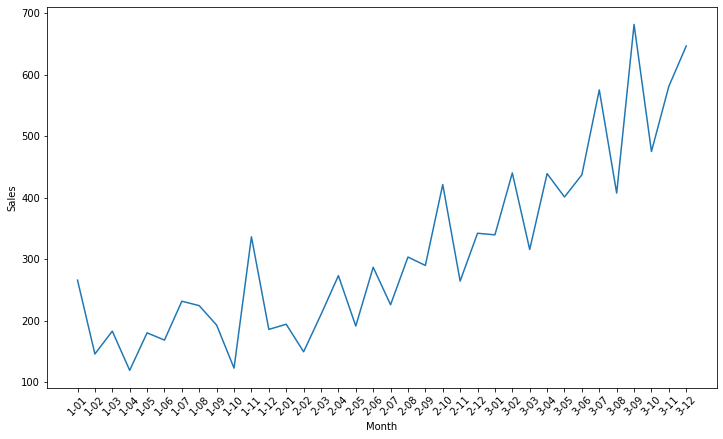

In [9]:
fig, ax = plt.subplots(figsize=(12,7))
sns.lineplot(x='Month', y='Sales', data=df_shampoo)
plt.xticks(rotation=45)
plt.show()

In [10]:
# y_t = random noise + trend + seasonality + error

In [11]:
df_shampoo['Month'] = df_shampoo['Month'].apply(lambda x: '200' + x)
df_shampoo['Month'] = pd.to_datetime(df_shampoo['Month'], format='%Y-%m')
df_shampoo

,Month,Sales
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3
5,2001-06-01,168.5
6,2001-07-01,231.8
7,2001-08-01,224.5
8,2001-09-01,192.8
9,2001-10-01,122.9


In [12]:
df_shampoo.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [13]:
df_shampoo_ix = df_shampoo.set_index('Month')
df_shampoo_ix

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3
2001-06-01,168.5
2001-07-01,231.8
2001-08-01,224.5
2001-09-01,192.8


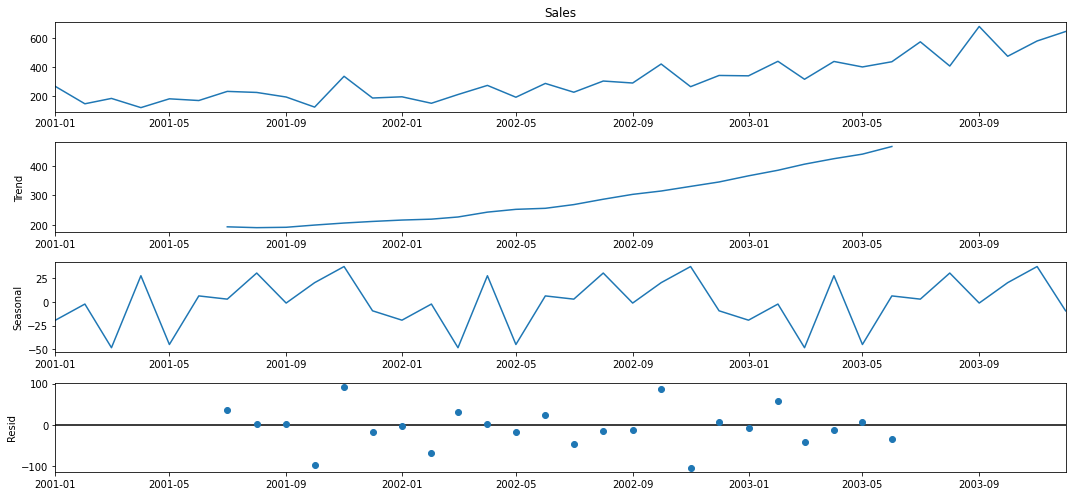

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = (15,7)

decomposed = seasonal_decompose(df_shampoo_ix['Sales'])

decomposed.plot()
plt.show();

## Statistical Test for Checking Stationarity

Augmented Dickey-Fuller Test (ADF Test)

$H_0$: The series has a unit root (non-stationary)

$H_1$: The series doesn't have a unit root (stationary)

In [15]:
from statsmodels.tsa.stattools import adfuller

test = adfuller(df_shampoo['Sales'])
output = pd.Series(
    test[:4],
    index=['Test statistic', 'p-value', '# of lags', '# of observations']
)

output

Test statistic        3.060142
p-value               1.000000
# of lags            10.000000
# of observations    25.000000
dtype: float64

In [16]:
for key, value in test[4].items():
    output['Critical Value ({})'.format(key)] = value
output

Test statistic           3.060142
p-value                  1.000000
# of lags               10.000000
# of observations       25.000000
Critical Value (1%)     -3.723863
Critical Value (5%)     -2.986489
Critical Value (10%)    -2.632800
dtype: float64

If the test statistic is less than critical value, we can reject the null hypothesis.

KPSS

$H_0$: The series is stationary 

$H_1$: The series has a unit root (non-stationary)

In [17]:
from statsmodels.tsa.stattools import kpss 

test = kpss(df_shampoo['Sales'])
output = pd.Series(
    test[:3],
    index=['Test statistic', 'p-value', '# of lags']
)

output

/home/idrishaidar/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


Test statistic     0.439388
p-value            0.060178
# of lags         10.000000
dtype: float64

In [18]:
for key, value in test[3].items():
    output['Critical Value ({})'.format(key)] = value
output

Test statistic            0.439388
p-value                   0.060178
# of lags                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

If the test statistic is greater than the critical value, we reject the null hypothesis.

## Differencing

In [19]:
df_shampoo['Sales_lag_1'] = df_shampoo['Sales'].shift(1)
df_shampoo['Sales_lag_2'] = df_shampoo['Sales'].shift(2)
df_shampoo['Sales_diff_1'] = df_shampoo['Sales'] - df_shampoo['Sales_lag_1']
# df_shampoo['Sales_diff_2'] = df_shampoo['Sales'] - df_shampoo['Sales_lag_2']
df_shampoo['Sales_diff_2'] = df_shampoo['Sales_diff_1'] - df_shampoo['Sales_diff_1'].shift(1)
df_shampoo['Sales_diff_2_alt'] = df_shampoo['Sales'] - (2 * df_shampoo['Sales_lag_1']) + df_shampoo['Sales_lag_2']
df_shampoo.head()

,Month,Sales,Sales_lag_1,Sales_lag_2,Sales_diff_1,Sales_diff_2,Sales_diff_2_alt
0,2001-01-01,266.0,NaN,NaN,NaN,NaN,NaN
1,2001-02-01,145.9,266.0,NaN,-120.1,NaN,NaN
2,2001-03-01,183.1,145.9,266.0,37.2,157.3,157.3
3,2001-04-01,119.3,183.1,145.9,-63.8,-101.0,-101.0
4,2001-05-01,180.3,119.3,183.1,61.0,124.8,124.8


<AxesSubplot:xlabel='Month', ylabel='Sales_diff_1'>

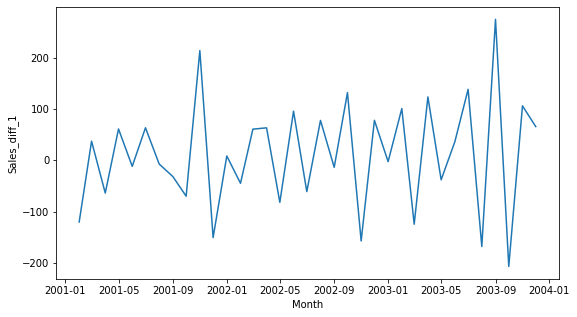

In [20]:
plt.figure(figsize=(9,5))
sns.lineplot(x='Month', y='Sales_diff_1', data=df_shampoo)

In [21]:
test = adfuller(df_shampoo['Sales_diff_1'].dropna())
output = pd.Series(
    test[:4],
    index=['Test statistic', 'p-value', '# of lags', '# of observations']
)
for key, value in test[4].items():
    output['Critical Value ({})'.format(key)] = value
output

Test statistic         -7.249074e+00
p-value                 1.799857e-10
# of lags               1.000000e+00
# of observations       3.300000e+01
Critical Value (1%)    -3.646135e+00
Critical Value (5%)    -2.954127e+00
Critical Value (10%)   -2.615968e+00
dtype: float64

Augmented Dickey-Fuller Test (ADF Test)

𝐻0

: The series has a unit root (non-stationary)

𝐻1
: The series doesn't have a unit root (stationary)

In [22]:
df_shampoo_ix = df_shampoo.set_index('Month')

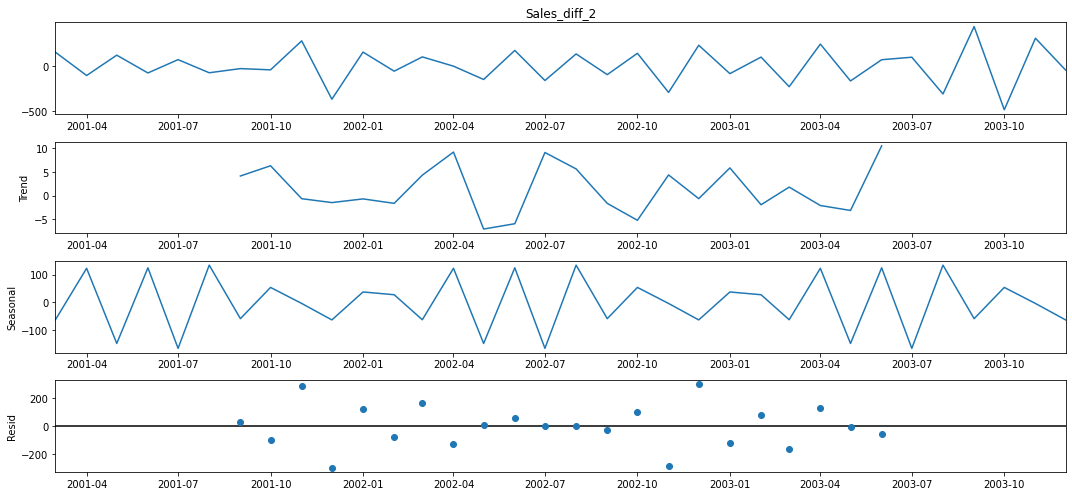

In [23]:
seasonal_decompose(df_shampoo_ix['Sales_diff_2'].dropna()).plot();

## ACF-PACF Plot

/home/idrishaidar/miniconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


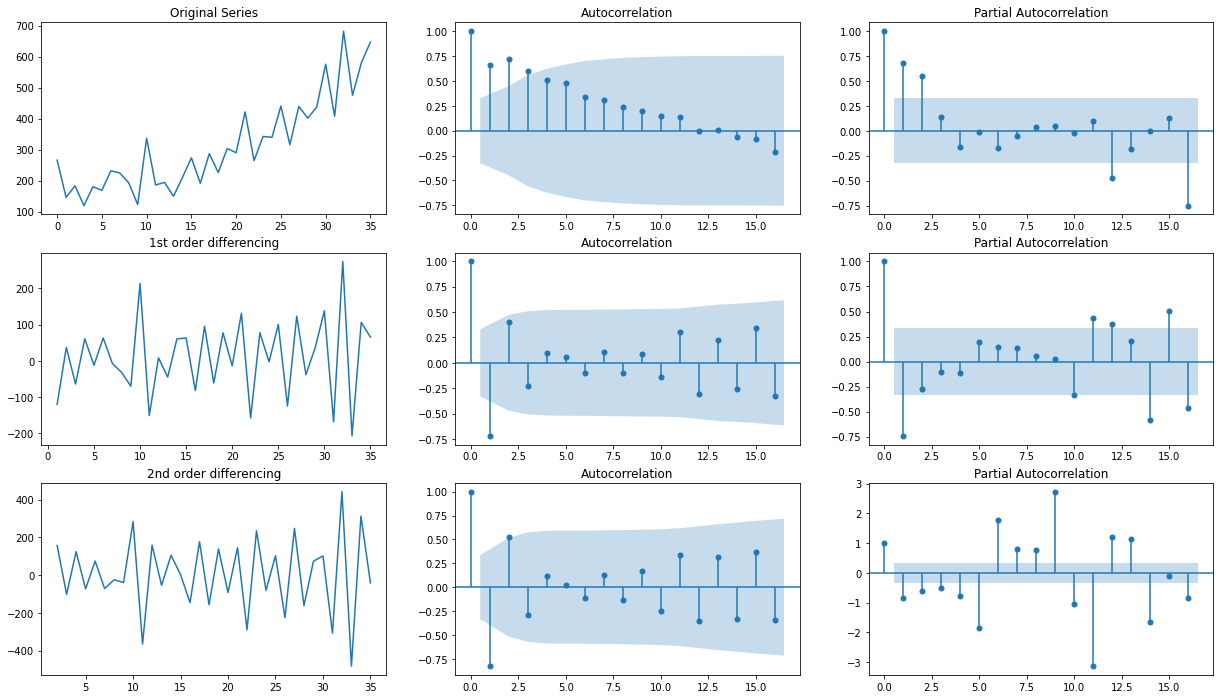

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(3,3,figsize=(21,12))
# original
ax[0,0].plot(df_shampoo['Sales'])
ax[0,0].set_title('Original Series')
plot_acf(df_shampoo['Sales'], ax=ax[0,1])
plot_pacf(df_shampoo['Sales'], ax=ax[0,2])

# 1st differencing
ax[1,0].plot(df_shampoo['Sales_diff_1'])
ax[1,0].set_title('1st order differencing')
plot_acf(df_shampoo['Sales_diff_1'].dropna(), ax=ax[1,1])
plot_pacf(df_shampoo['Sales_diff_1'].dropna(), ax=ax[1,2])

# # 2nd differencing
ax[2,0].plot(df_shampoo['Sales_diff_2'])
ax[2,0].set_title('2nd order differencing')
plot_acf(df_shampoo['Sales_diff_2'].dropna(), ax=ax[2,1])
plot_pacf(df_shampoo['Sales_diff_2'].dropna(), ax=ax[2,2]);

ARIMA model candidates:
- ARIMA(2,1,0) --> cut off in PACF at lag 2; p=2, d=1, q=0 (AR model)
- ARIMA(0,1,2) --> cut off in ACF at lag 2; p=0, d=1, q=2 (MA model)

In [25]:
from statsmodels.tsa.stattools import acf, pacf

def plot_acf_pacf(df, ts):
    """
    Plot auto-correlation function (ACF) and partial auto-correlation (PACF) plots
    """
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (14, 5)) 

    #Plot ACF: 

    ax1.plot(lag_acf)
    ax1.axhline(y=0,linestyle='--',color='gray')
    ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax1.set_title('Autocorrelation Function for %s' %(ts))

    #Plot PACF:
    ax2.plot(lag_pacf)
    ax2.axhline(y=0,linestyle='--',color='gray')
    ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax2.set_title('Partial Autocorrelation Function for %s' %(ts))

    plt.tight_layout()
    plt.show()
    plt.close()

    return

/home/idrishaidar/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


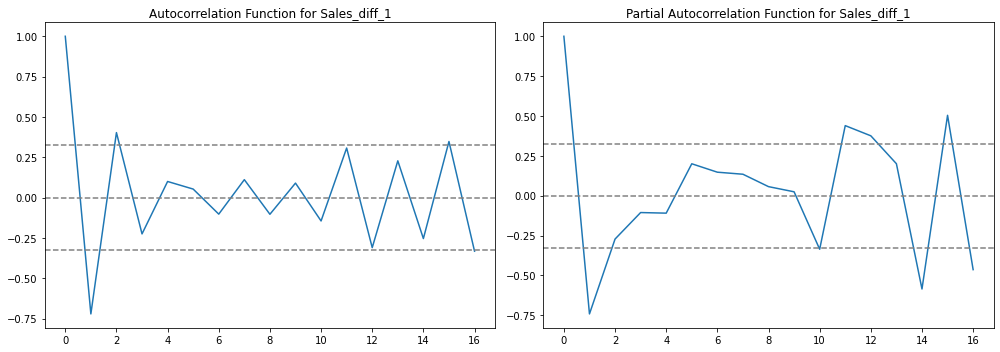

In [26]:
# determine ACF and PACF
lag_acf = acf(np.array(df_shampoo['Sales_diff_1'].dropna()), nlags = 16)
lag_pacf = pacf(np.array(df_shampoo['Sales_diff_1'].dropna()), nlags = 16)

# plot ACF and PACF
plot_acf_pacf(df = df_shampoo, ts = 'Sales_diff_1')

In [27]:
import pmdarima as pmd

arima_model = pmd.auto_arima(
    df_shampoo['Sales'], 
    start_p=0,
    start_q=0,
    max_p=5,
    max_q=5,
    trace=True,
    d=None,
    test='adf'
)

# arima_mo

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=405.977, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=408.967, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=429.229, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=403.573, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=404.633, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=404.226, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=402.407, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401.463, Time=0.63 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.87 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec

Best 

In [28]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -195.731
Date:                Wed, 21 Apr 2021   AIC                            401.463
Time:                        16:30:03   BIC                            409.240
Sample:                             0   HQIC                           404.147
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.3044      6.175      1.507      0.132      -2.798      21.407
ar.L1          0.0890      0.314      0.284      0.777      -0.526       0.704
ma.L1         -1.3867      0.315     -4.409      0.000      -2.003      -0.770
ma.L2          0.9422      0.448      2.101      0.036       0.063       1.821
sigma2      3697.0418   1455.965      2.539      0.011     843.402    6550.682
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.64   Prob(JB):                         0.67
Heteroskedasticity (H):               0.95   Skew:                             0.30
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
# arima_model = ARIMA(df_shampoo['Sales'], order=(1,1,2))
# arima_model_fit = arima_model.fit()

In [31]:
# arima_model_fit.forecast(6)

In [32]:
# fig, ax = plt.subplots(figsize=(9,5))
# plt.plot(arima_model_fit.fittedvalues, color='red')
# plt.plot(df_shampoo['Sales_diff_1'])
# # plt.plot(arima_model_fit.forecast(6))

## Modelling

In [33]:
# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA


arima_model = ARIMA(df_shampoo['Sales'], order=(2,1,0))
arima_model_fit = arima_model.fit()

/home/idrishaidar/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [34]:
print(arima_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -197.814
Method:                       css-mle   S.D. of innovations             67.833
Date:                Wed, 21 Apr 2021   AIC                            403.628
Time:                        16:31:17   BIC                            409.849
Sample:                             1   HQIC                           405.775
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6504      4.907      2.374      0.018       2.034      21.267
ar.L1.D.Sales    -1.0223      0.167     -6.109      0.000      -1.350      -0.694
ar.L2.D.Sales    -0.3655      0.167     

## Forecasting

In [35]:
forecast_length = 6
forecast_result = arima_model_fit.forecast(forecast_length)

In [36]:
print('Forecast result')
forecast_result[0]

Forecast result


array([568.90822769, 652.48159136, 623.37089765, 650.40199149,
       661.22806009, 668.09906228])

In [37]:
print('Forecast standard error')
forecast_result[1].mean()

Forecast standard error


80.697326568791

In [38]:
print('Forecast confidence interval')
forecast_result[2]

Forecast confidence interval


array([[435.95896068, 701.85749469],
       [519.49919705, 785.46398568],
       [464.24641956, 782.49537575],
       [485.11900416, 815.68497882],
       [486.93579455, 835.52032564],
       [483.74733223, 852.45079234]])

In [39]:
forecasted_month = []

for i in range(1, forecast_length + 1):
    forecasted_month.append('2004-'+str(i))

forecasted_month

['2004-1', '2004-2', '2004-3', '2004-4', '2004-5', '2004-6']

In [40]:
df_shampoo_forecast = pd.DataFrame({
    'Month': forecasted_month,
    'Sales': forecast_result[0],
    'Std. Error': forecast_result[1],
    'Lower bound CI': forecast_result[2][:, 0],
    'Upper bound CI': forecast_result[2][:, 1],
})

df_shampoo_forecast['Month'] = pd.to_datetime(df_shampoo_forecast['Month'], format=('%Y-%m'))
df_shampoo_forecast

,Month,Sales,Std. Error,Lower bound CI,Upper bound CI
0,2004-01-01,568.908228,67.832505,435.958961,701.857495
1,2004-02-01,652.481591,67.849407,519.499197,785.463986
2,2004-03-01,623.370898,81.187450,464.246420,782.495376
3,2004-04-01,650.401991,84.329604,485.119004,815.684979
4,2004-05-01,661.228060,88.926259,486.935795,835.520326
5,2004-06-01,668.099062,94.058733,483.747332,852.450792


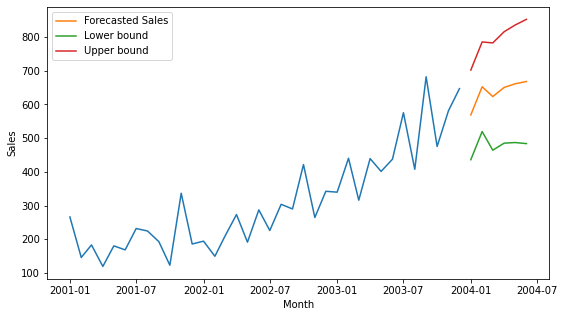

In [41]:
fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(x='Month', y='Sales', data=df_shampoo, ax=ax)
sns.lineplot(x='Month', y='Sales', data=df_shampoo_forecast, ax=ax, label='Forecasted Sales')
sns.lineplot(x='Month', y='Lower bound CI', data=df_shampoo_forecast, ax=ax, label='Lower bound')
sns.lineplot(x='Month', y='Upper bound CI', data=df_shampoo_forecast, ax=ax, label='Upper bound')
plt.legend()

# OPSD 

In [42]:
df_elec = pd.read_csv('opsd_germany_daily.csv')

In [43]:
df_elec.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [44]:
df_elec['Date'] = pd.to_datetime(df_elec['Date'], format='%Y-%m-%d')

In [45]:
df_elec.isna().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [46]:
df_elec_ix = df_elec.set_index('Date')

<AxesSubplot:xlabel='Date', ylabel='Consumption'>

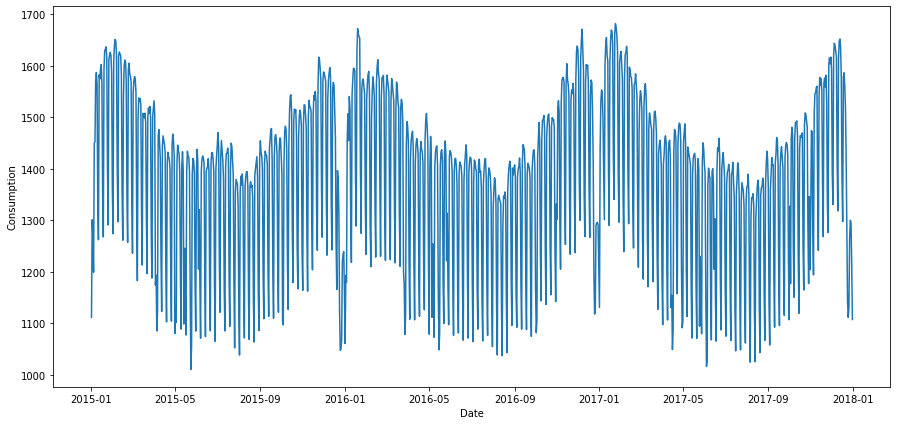

In [47]:
sns.lineplot(x='Date', y='Consumption', data=df_elec[df_elec['Date'].dt.year >= 2015])

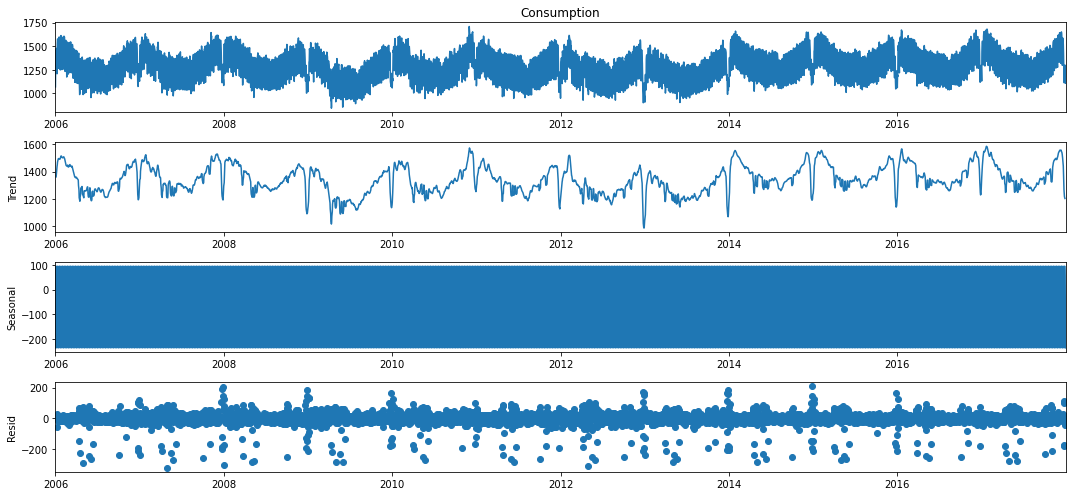

In [48]:
decomposed = seasonal_decompose(df_elec_ix['Consumption'])
decomposed.plot();

In [49]:
test = adfuller(df_elec['Consumption'])
test

(-6.239148288864487,
 4.744054901842357e-08,
 31,
 4351,
 {'1%': -3.4318538295011636,
  '5%': -2.8622045082106773,
  '10%': -2.5671237222704466},
 47966.592823559666)

    -6.239148288864487 (test statistic)
    -2.8622045082106773 (critical value 5%)
    reject null hypothesis --> stationary

In [50]:
test = kpss(df_elec['Consumption'])
test

/home/idrishaidar/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


(0.7298591634582234,
 0.010830985140161505,
 31,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

    0.7298591634582234
    0.463

    reject null hypothesis --> not stationary

In [51]:
df_elec['Consumption_lag_1'] = df_elec['Consumption'].shift(1)
df_elec['Consumption_diff_1'] = df_elec['Consumption'] - df_elec['Consumption_lag_1']
df_elec['Consumption_lag_2'] = df_elec['Consumption'].shift(2)
df_elec['Consumption_diff_2'] = df_elec['Consumption'] - df_elec['Consumption_lag_2']
df_elec

,Date,Consumption,Wind,Solar,Wind+Solar,Consumption_lag_1,Consumption_diff_1,Consumption_lag_2,Consumption_diff_2
0,2006-01-01,1069.18400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN,1069.18400,311.33700,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN,1380.52100,62.01200,1069.18400,373.34900
3,2006-01-04,1457.21700,NaN,NaN,NaN,1442.53300,14.68400,1380.52100,76.69600
4,2006-01-05,1477.13100,NaN,NaN,NaN,1457.21700,19.91400,1442.53300,34.59800
...,...,...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,1130.11683,133.82408,1111.28338,152.65753
4379,2017-12-28,1299.86398,506.424,14.162,520.586,1263.94091,35.92307,1130.11683,169.74715
4380,2017-12-29,1295.08753,584.277,29.854,614.131,1299.86398,-4.77645,1263.94091,31.14662
4381,2017-12-30,1215.44897,721.247,7.467,728.714,1295.08753,-79.63856,1299.86398,-84.41501


<AxesSubplot:xlabel='Date', ylabel='Consumption_diff_2'>

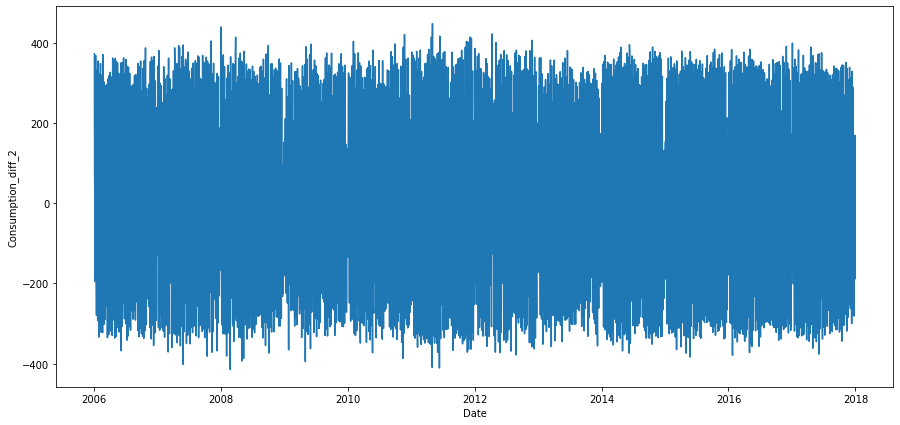

In [52]:
sns.lineplot(x='Date', y='Consumption_diff_2', data=df_elec)

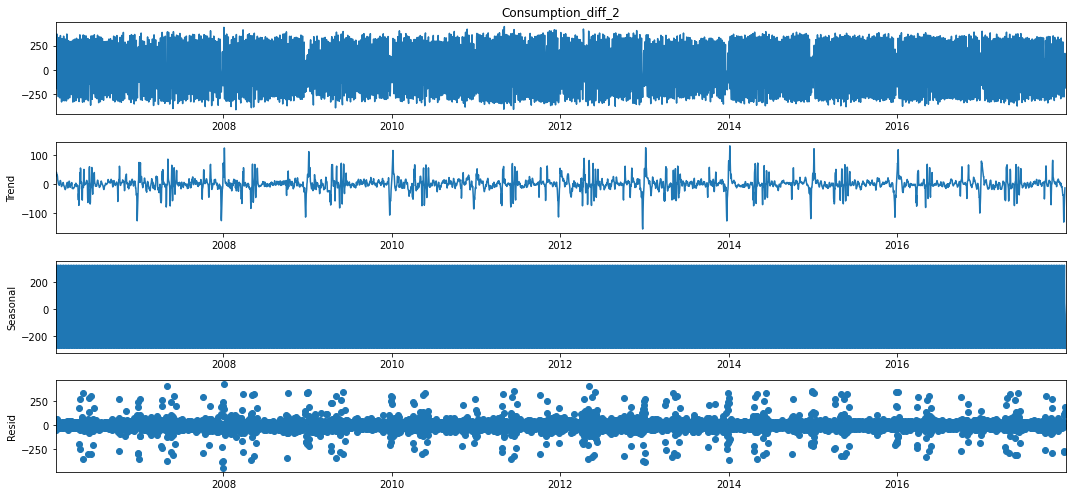

In [53]:
df_elec_ix = df_elec.set_index('Date')
decomposed = seasonal_decompose(df_elec_ix['Consumption_diff_2'].dropna())
decomposed.plot();

<AxesSubplot:xlabel='Date'>

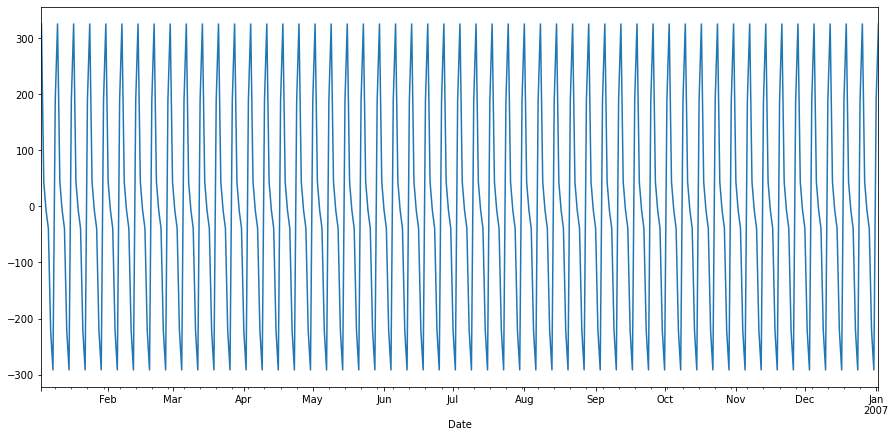

In [54]:
decomposed.seasonal[:365].plot()

/home/idrishaidar/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


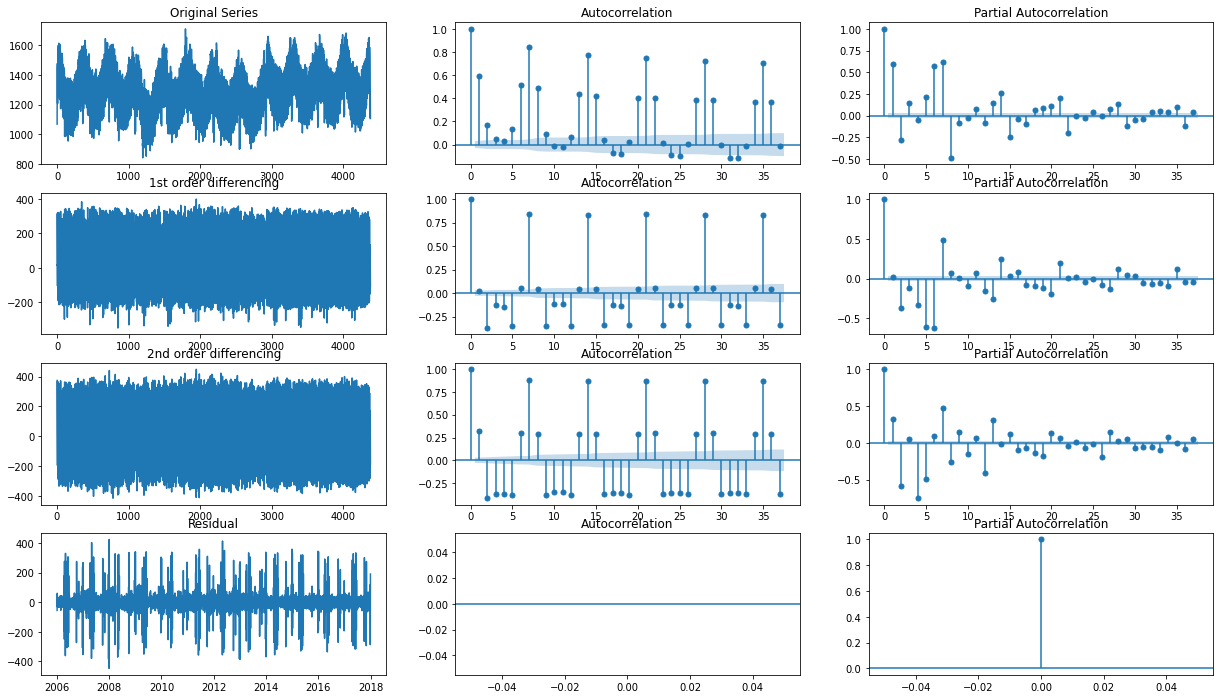

In [55]:
fig, ax = plt.subplots(4,3,figsize=(21,12))
# original
ax[0,0].plot(df_elec['Consumption'])
ax[0,0].set_title('Original Series')
plot_acf(df_elec['Consumption'], ax=ax[0,1])
plot_pacf(df_elec['Consumption'], ax=ax[0,2])

# 1st differencing
ax[1,0].plot(df_elec['Consumption_diff_1'])
ax[1,0].set_title('1st order differencing')
plot_acf(df_elec['Consumption_diff_1'].dropna(), ax=ax[1,1])
plot_pacf(df_elec['Consumption_diff_1'].dropna(), ax=ax[1,2])

# # 2nd differencing
ax[2,0].plot(df_elec['Consumption_diff_2'])
ax[2,0].set_title('2nd order differencing')
plot_acf(df_elec['Consumption_diff_2'].dropna(), ax=ax[2,1])
plot_pacf(df_elec['Consumption_diff_2'].dropna(), ax=ax[2,2])

# residual
ax[3,0].plot(decomposed.resid)
ax[3,0].set_title('Residual')
plot_acf(decomposed.resid, ax=ax[3,1])
plot_pacf(decomposed.resid, ax=ax[3,2]);

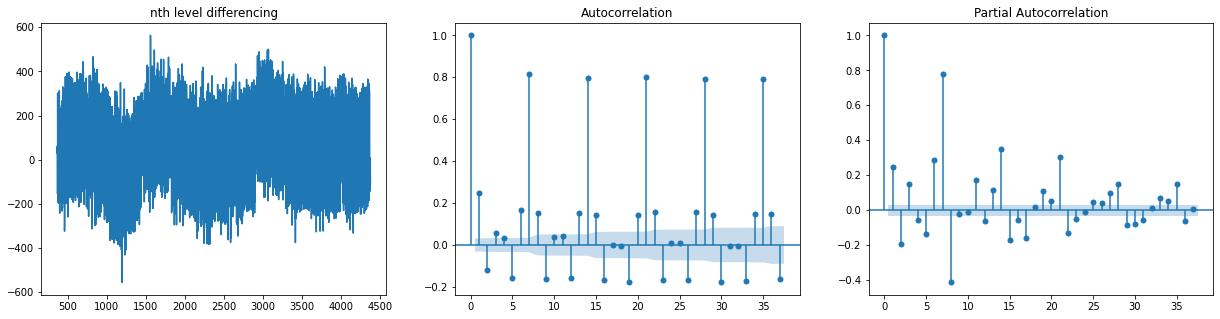

In [56]:
df_elec['Consumption_diff_n'] = df_elec['Consumption'] - df_elec['Consumption'].shift(365)

fig, ax = plt.subplots(1,3, figsize=(21,5))
ax[0].plot(df_elec['Consumption_diff_n'].dropna())
ax[0].set_title('nth level differencing')
plot_acf(df_elec['Consumption_diff_n'].dropna(), ax=ax[1])
plot_pacf(df_elec['Consumption_diff_n'].dropna(), ax=ax[2]);

In [57]:
test = adfuller(df_elec['Consumption_diff_n'].dropna())
test

(-5.1508889358884975,
 1.1065921673444535e-05,
 30,
 3987,
 {'1%': -3.4319912127364143,
  '5%': -2.8622651980110834,
  '10%': -2.567156030734827},
 45134.36190738641)

In [58]:
test = kpss(df_elec['Consumption_diff_n'].dropna())
test

/home/idrishaidar/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


(0.5800598425673983,
 0.024449105221145608,
 31,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [60]:
arima_model = ARIMA(df_elec_ix['Consumption'], order=(2,1,2))
arima_model_fit = arima_model.fit()

/home/idrishaidar/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/idrishaidar/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided,

In [61]:
forecast_length=365
forecast_result = arima_model_fit.forecast(forecast_length)

In [62]:
df_elec_wo_index = df_elec.reset_index().rename(columns={'index': 'day'})
df_elec_wo_index

,day,Date,Consumption,Wind,Solar,Wind+Solar,Consumption_lag_1,Consumption_diff_1,Consumption_lag_2,Consumption_diff_2,Consumption_diff_n
0,0,2006-01-01,1069.18400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2006-01-02,1380.52100,NaN,NaN,NaN,1069.18400,311.33700,NaN,NaN,NaN
2,2,2006-01-03,1442.53300,NaN,NaN,NaN,1380.52100,62.01200,1069.18400,373.34900,NaN
3,3,2006-01-04,1457.21700,NaN,NaN,NaN,1442.53300,14.68400,1380.52100,76.69600,NaN
4,4,2006-01-05,1477.13100,NaN,NaN,NaN,1457.21700,19.91400,1442.53300,34.59800,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4378,4378,2017-12-27,1263.94091,394.507,16.530,411.037,1130.11683,133.82408,1111.28338,152.65753,-25.38309
4379,4379,2017-12-28,1299.86398,506.424,14.162,520.586,1263.94091,35.92307,1130.11683,169.74715,4.98298
4380,4380,2017-12-29,1295.08753,584.277,29.854,614.131,1299.86398,-4.77645,1263.94091,31.14662,-0.80947
4381,4381,2017-12-30,1215.44897,721.247,7.467,728.714,1295.08753,-79.63856,1299.86398,-84.41501,-75.59503


In [63]:
len(forecast_result[0])

365

In [64]:
(len(df_elec_wo_index) + len(forecast_result[0])) - (len(df_elec_wo_index))

365

In [65]:
forecasted_date = []

for i in range(len(df_elec_wo_index), len(df_elec_wo_index) + len(forecast_result[0])):
    forecasted_date.append(i)

forecasted_month
df_elec_forecast = pd.DataFrame({
    'day': forecasted_date,
    'Consumption': forecast_result[0],
    'Std. Error': forecast_result[1],
    'Lower bound CI': forecast_result[2][:, 0],
    'Upper bound CI': forecast_result[2][:, 1],
})

# df_shampoo_forecast['Month'] = pd.to_datetime(df_shampoo_forecast['Month'], format=('%Y-%m'))
df_elec_forecast

,day,Consumption,Std. Error,Lower bound CI,Upper bound CI
0,4383,1054.644483,112.270858,834.597644,1274.691321
1,4384,1085.851548,130.129564,830.802289,1340.900807
2,4385,1160.247653,130.476590,904.518235,1415.977070
3,4386,1218.017896,131.542529,960.199277,1475.836515
4,4387,1224.482617,131.564851,966.620247,1482.344986
...,...,...,...,...,...
360,4743,1150.694947,673.231621,-168.814784,2470.204679
361,4744,1150.664745,674.128340,-170.602522,2471.932013
362,4745,1150.634543,675.023868,-172.387926,2473.657013
363,4746,1150.604341,675.918209,-174.171004,2475.379687


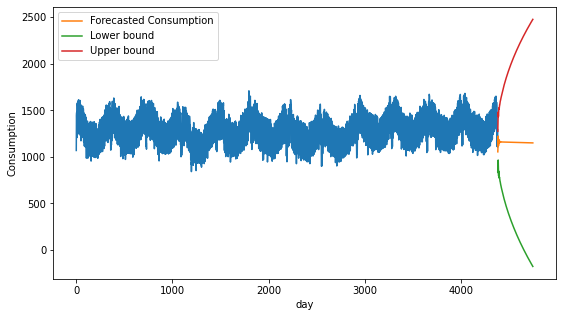

In [66]:
fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(x='day', y='Consumption', data=df_elec_wo_index, ax=ax)
sns.lineplot(x='day', y='Consumption', data=df_elec_forecast, ax=ax, label='Forecasted Consumption')
sns.lineplot(x='day', y='Lower bound CI', data=df_elec_forecast, ax=ax, label='Lower bound')
sns.lineplot(x='day', y='Upper bound CI', data=df_elec_forecast, ax=ax, label='Upper bound')
plt.legend()

In [67]:
df_elec_ori = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
df_elec_ori

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [68]:
# check data type
df_elec_ori.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [69]:
df_elec_ori['Date'] = pd.to_datetime(df_elec_ori['Date'], format='%Y-%m-%d')

In [70]:
df_elec_ori.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [71]:
df_elec_ori['Year'] = df_elec_ori['Date'].dt.year
df_elec_ori['Month'] = df_elec_ori['Date'].dt.month
df_elec_ori['Day'] = df_elec_ori['Date'].dt.day
df_elec_ori['Weekday'] = df_elec_ori['Date'].dt.dayofweek

In [72]:
df_elec_ori.head()

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day,Weekday
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,1,1,6
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,1,2,0
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,1,3,1
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,1,4,2
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,1,5,3


<AxesSubplot:xlabel='Year', ylabel='Consumption'>

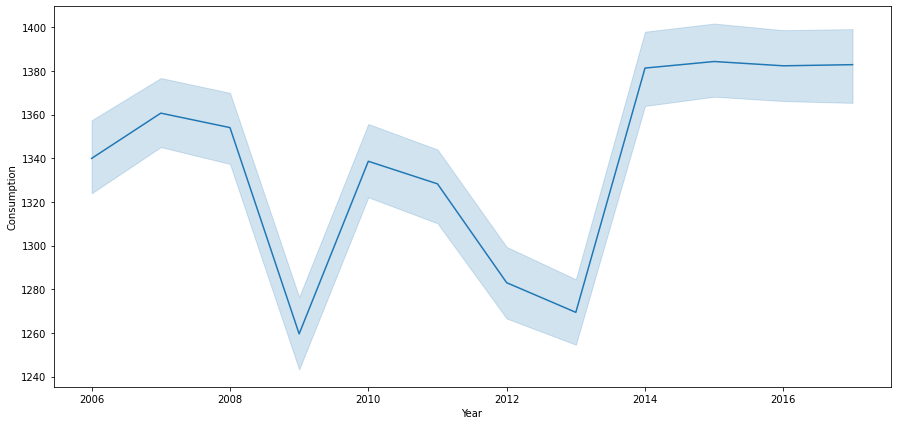

In [73]:
# eda
sns.lineplot(x='Year', y='Consumption', data=df_elec_ori)

<AxesSubplot:xlabel='Month'>

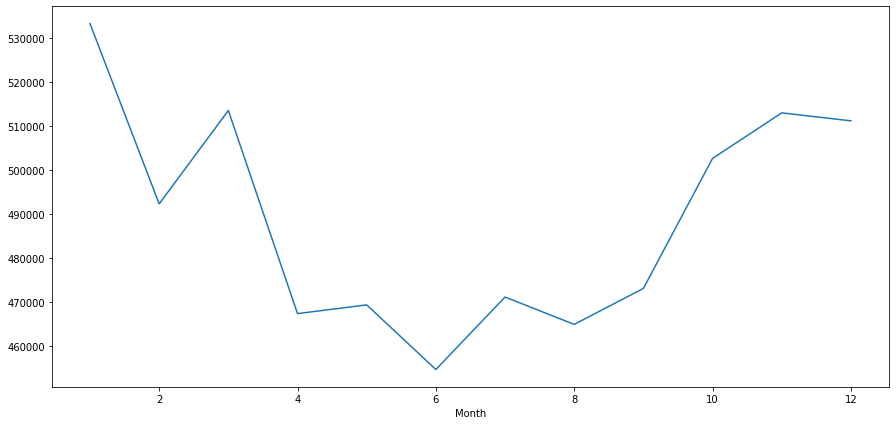

In [74]:
df_elec_ori.groupby('Month')['Consumption'].sum().plot()

In [75]:
df_elec_8y = df_elec_ori[df_elec_ori['Year'].isin([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])].copy()

In [79]:
df_elec_8y['Consumption_rolling_7d'] = df_elec_8y['Consumption'].rolling(7).mean()
df_elec_8y['Consumption_rolling_1mo'] = df_elec_8y['Consumption'].rolling(30).mean()

df_elec_8y

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day,Weekday,Consumption_rolling_7d,Consumption_rolling_1mo
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,1,1,6,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,1,2,0,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,1,3,1,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,1,4,2,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,1,5,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2917,2013-12-27,1166.552,395.736,41.011,436.747,2013,12,27,4,1124.321286,1341.795967
2918,2013-12-28,1089.790,208.514,21.028,229.542,2013,12,28,5,1101.317429,1327.831833
2919,2013-12-29,1031.149,213.978,20.933,234.911,2013,12,29,6,1085.485143,1312.578467
2920,2013-12-30,1149.097,254.119,47.097,301.216,2013,12,30,0,1078.232571,1309.062000


<AxesSubplot:xlabel='Date', ylabel='Consumption'>

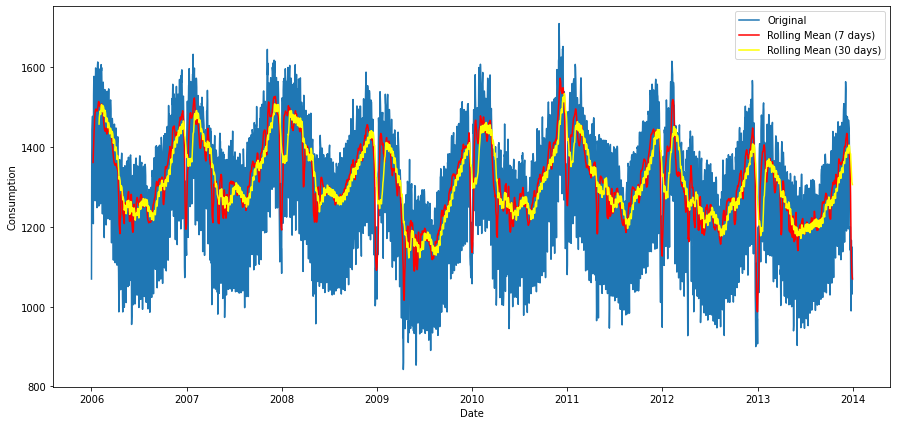

In [80]:
sns.lineplot(x='Date', y='Consumption', data=df_elec_8y, label='Original')
sns.lineplot(x='Date', y='Consumption_rolling_7d', data=df_elec_8y, color='red', label='Rolling Mean (7 days)')
sns.lineplot(x='Date', y='Consumption_rolling_1mo', data=df_elec_8y, color='yellow', label='Rolling Mean (30 days)')

In [81]:
test_results = adfuller(df_elec_8y['Consumption'])
alpha = 0.05
if test_results[1] <= alpha:
    print('Reject null hypothesis; The series doesn\'t have a unit root')
else:
    print('Failed to reject null hypothesis; The series has a unit root')

Reject null hypothesis; The series doesn't have a unit root


In [82]:
test_results_2 = kpss(df_elec_8y['Consumption'])
alpha = 0.05
if test_results_2[1] <= alpha:
    print('Reject null hypothesis; The series has a unit root')
else:
    print('Failed to reject null hypothesis; The series is stationary')

Reject null hypothesis; The series has a unit root


/home/idrishaidar/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/idrishaidar/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Consumption_diff_1'>

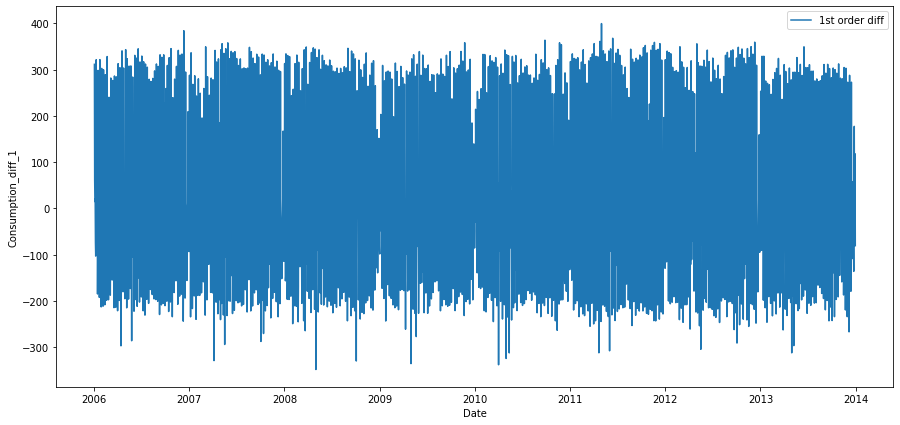

In [83]:
df_elec_8y['Consumption_diff_1'] = df_elec_8y['Consumption'] - df_elec_8y['Consumption'].shift(1)
sns.lineplot(x='Date', y='Consumption_diff_1', data=df_elec_8y, label='1st order diff')

In [84]:
df_elec_8y

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day,Weekday,Consumption_rolling_7d,Consumption_rolling_1mo,Consumption_diff_1
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,1,1,6,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,1,2,0,NaN,NaN,311.337
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,1,3,1,NaN,NaN,62.012
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,1,4,2,NaN,NaN,14.684
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,1,5,3,NaN,NaN,19.914
...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2013-12-27,1166.552,395.736,41.011,436.747,2013,12,27,4,1124.321286,1341.795967,177.298
2918,2013-12-28,1089.790,208.514,21.028,229.542,2013,12,28,5,1101.317429,1327.831833,-76.762
2919,2013-12-29,1031.149,213.978,20.933,234.911,2013,12,29,6,1085.485143,1312.578467,-58.641
2920,2013-12-30,1149.097,254.119,47.097,301.216,2013,12,30,0,1078.232571,1309.062000,117.948


In [85]:
df_elec_8y_train = df_elec_8y[df_elec_8y['Year'] <= 2011]
df_elec_8y_val = df_elec_8y[df_elec_8y['Year'] == 2012]
df_elec_8y_test = df_elec_8y[df_elec_8y['Year'] == 2013]

X_train = df_elec_8y_train[['Year', 'Month', 'Day', 'Weekday']]
y_train = df_elec_8y_train['Consumption']

X_val = df_elec_8y_val[['Year', 'Month', 'Day', 'Weekday']]
y_val = df_elec_8y_val['Consumption']

X_test = df_elec_8y_test[['Year', 'Month', 'Day', 'Weekday']]
y_test = df_elec_8y_test['Consumption']

In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), ['Month', 'Day', 'Weekday'])
], remainder='passthrough')

# encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = transformer.fit_transform(X_train)
X_val_encoded = transformer.transform(X_val)
X_test_encoded = transformer.transform(X_test)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_encoded)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
lin_reg.score(X_train_poly, y_train)

0.8798065114562736

In [88]:
y_pred = lin_reg.predict(X_train_poly)

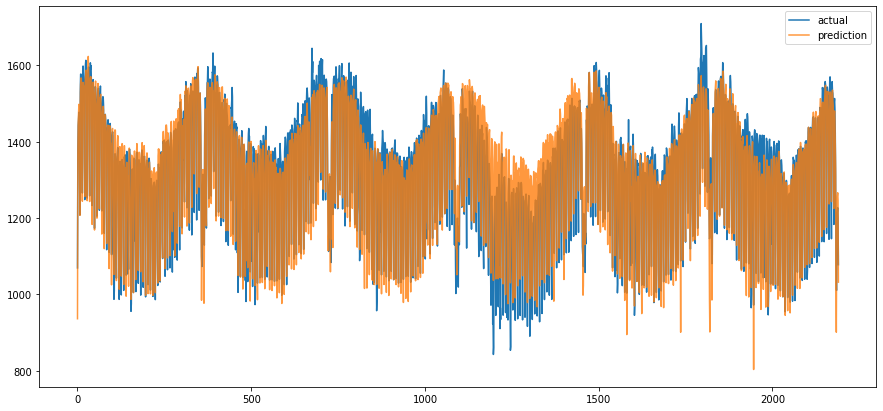

In [89]:
y_train.plot(label='actual')
pd.Series(y_pred).plot(label='prediction', alpha=0.8)
plt.legend()

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

np.sqrt(mean_squared_error(y_train, y_pred))

56.98624862790562

In [91]:
X_val_poly = poly.transform(X_val_encoded)
y_pred_val = lin_reg.predict(X_val_poly)

In [92]:
lin_reg.score(X_val_poly, y_val)

0.8403447667201627

In [93]:
y_val.reset_index()

,index,Consumption
0,2191,948.128
1,2192,1269.581
2,2193,1334.745
3,2194,1347.136
4,2195,1376.658
...,...,...
361,2552,1068.617
362,2553,1109.424
363,2554,1014.550
364,2555,936.786


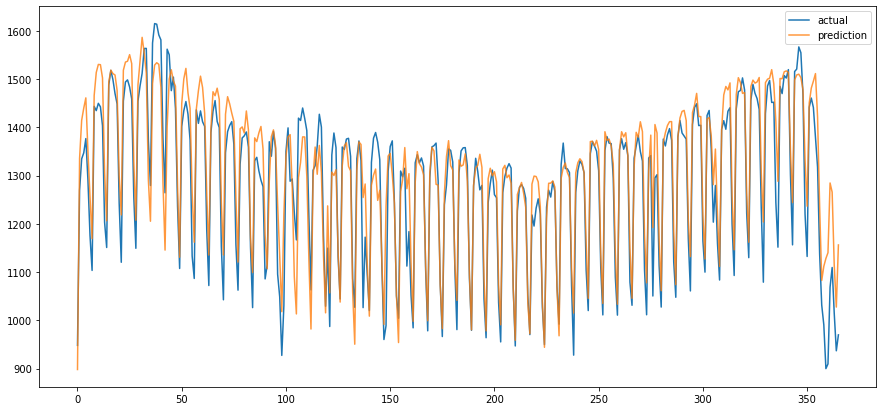

In [94]:
y_val.reset_index()['Consumption'].plot(label='actual')
pd.Series(y_pred_val).plot(label='prediction', alpha=0.8)
plt.legend()

In [95]:
X_test_poly = poly.transform(X_test_encoded)
y_pred_test = lin_reg.predict(X_test_poly)

In [96]:
lin_reg.score(X_test_poly, y_test)

0.7732434516443538

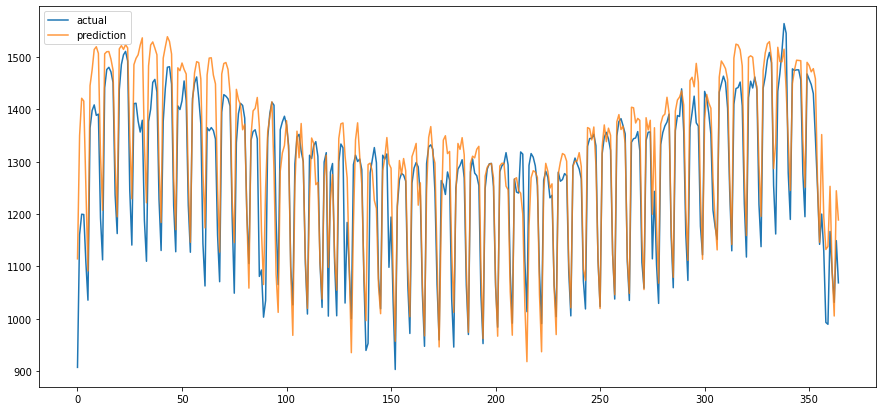

In [97]:
y_test.reset_index()['Consumption'].plot(label='actual')
pd.Series(y_pred_test).plot(label='prediction', alpha=0.8)
plt.legend()

Text(0, 0.5, 'Error')

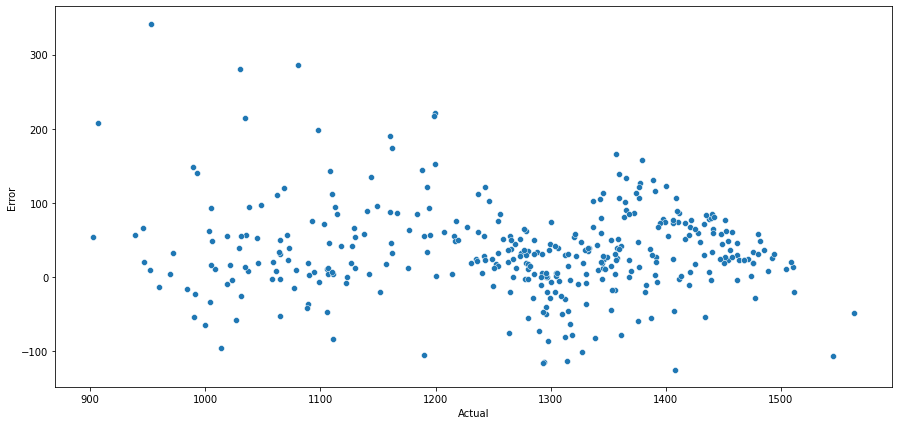

In [98]:
sns.scatterplot(x=y_test, y=y_pred_test - y_test)
plt.xlabel('Actual')
plt.ylabel('Error')

In [99]:
df_calendar = pd.read_csv('calendar.csv')

In [100]:
df_calendar[~df_calendar['holiday'].isna()].head(15)

,sasdate,date_key,word_date,date,year,quarter,month,day_of_month,week,day_of_week,weekday,month_and_year,holiday,timezone_id,timezone,timezone_offset
16,17,11860,"January 18, 1960",01/18/1960,1960,1,1,18,3,Mon,2,JAN1960,MLK,ETC/GMT+7,GMT-07:00,-25200
43,44,21460,"February 14, 1960",02/14/1960,1960,1,2,14,7,Sun,1,JAN1960,VALENTINES,ETC/GMT+7,GMT-07:00,-25200
44,45,21560,"February 15, 1960",02/15/1960,1960,1,2,15,7,Mon,2,JAN1960,USPRESIDENTS,ETC/GMT+7,GMT-07:00,-25200
106,107,41760,"April 17, 1960",04/17/1960,1960,2,4,17,16,Sun,1,JAN1960,EASTER,ETC/GMT+7,GMT-07:00,-25200
127,128,50860,"May 8, 1960",05/08/1960,1960,2,5,8,19,Sun,1,JAN1960,MOTHERS,ETC/GMT+7,GMT-07:00,-25200
142,143,52360,"May 23, 1960",05/23/1960,1960,2,5,23,21,Mon,2,JAN1960,VICTORIA,ETC/GMT+7,GMT-07:00,-25200
149,150,53060,"May 30, 1960",05/30/1960,1960,2,5,30,22,Mon,2,JAN1960,MEMORIAL,ETC/GMT+7,GMT-07:00,-25200
169,170,61960,"June 19, 1960",06/19/1960,1960,2,6,19,25,Sun,1,JAN1960,FATHERS,ETC/GMT+7,GMT-07:00,-25200
181,182,70160,"July 1, 1960",07/01/1960,1960,3,7,1,26,Fri,6,JAN1960,CANADA,ETC/GMT+7,GMT-07:00,-25200
184,185,70460,"July 4, 1960",07/04/1960,1960,3,7,4,27,Mon,2,JAN1960,USINDEPENDENCE,ETC/GMT+7,GMT-07:00,-25200


In [101]:
df_avocado = pd.read_csv('avocado.csv')

In [102]:
df_avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [103]:
df_avocado[df_avocado['region'] == 'Boston'].sort_values(by='Date')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
259,51,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,conventional,2015,Boston
9385,51,2015-01-04,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.00,organic,2015,Boston
258,50,2015-01-11,1.10,437771.89,5548.11,320577.36,121.81,111524.61,111192.88,331.73,0.00,conventional,2015,Boston
9384,50,2015-01-11,1.94,2217.82,12.82,956.07,0.00,1248.93,1248.93,0.00,0.00,organic,2015,Boston
257,49,2015-01-18,1.23,401331.33,4383.76,287778.52,132.53,109036.52,108668.74,367.78,0.00,conventional,2015,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17651,2,2018-03-11,1.85,30476.66,8.51,2114.28,0.00,28353.87,22732.95,5620.92,0.00,organic,2018,Boston
17650,1,2018-03-18,1.83,34809.90,20.31,2456.48,0.00,32333.11,25094.65,7238.46,0.00,organic,2018,Boston
8527,1,2018-03-18,1.38,602177.43,24831.59,443903.93,1853.86,131588.05,101891.24,28125.70,1571.11,conventional,2018,Boston
8526,0,2018-03-25,1.39,641462.43,26019.52,479186.12,1883.17,134373.62,109938.39,22955.23,1480.00,conventional,2018,Boston


In [104]:
df_avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [105]:
df_avocado_boston_all = df_avocado[
    df_avocado['region'] == 'Boston'
].groupby('Date').agg(
    {'Total Volume':'sum'}
).reset_index()

df_avocado_boston_all['Date'] = pd.to_datetime(df_avocado_boston_all['Date'])
df_avocado_boston_all

,Date,Total Volume
0,2015-01-04,493930.13
1,2015-01-11,439989.71
2,2015-01-18,403540.67
3,2015-01-25,411291.84
4,2015-02-01,492965.99
...,...,...
164,2018-02-25,558842.29
165,2018-03-04,809079.36
166,2018-03-11,659567.53
167,2018-03-18,636987.33


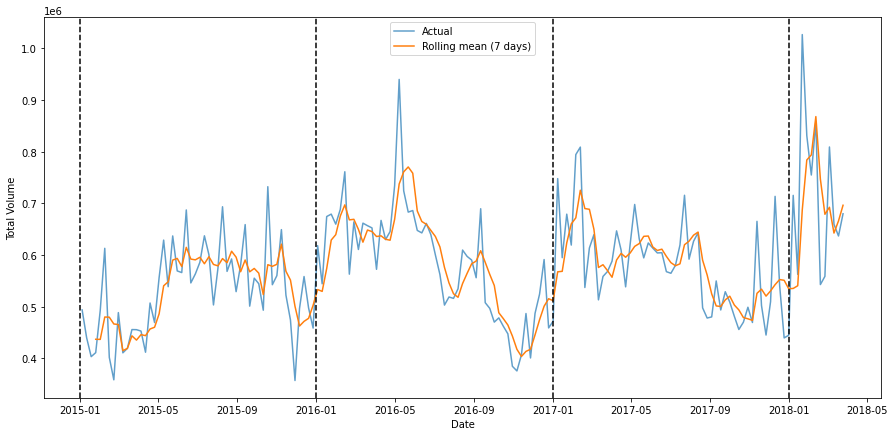

In [106]:
import datetime

df_avocado_boston_all['Total Volume_rolling_1mo'] = df_avocado_boston_all['Total Volume'].rolling(4).mean()

sns.lineplot(x='Date', y='Total Volume', data=df_avocado_boston_all, label='Actual', alpha=0.7)
sns.lineplot(x='Date', y='Total Volume_rolling_1mo', data=df_avocado_boston_all, label='Rolling mean (7 days)')
# plt.grid()
plt.axvline(datetime.datetime(2015, 1, 1), ls='--', color='black')
plt.axvline(datetime.datetime(2016, 1, 1), ls='--', color='black')
plt.axvline(datetime.datetime(2017, 1, 1), ls='--', color='black')
plt.axvline(datetime.datetime(2018, 1, 1), ls='--', color='black')

In [107]:
df_avocado_boston_ix = df_avocado_boston_all.set_index('Date')

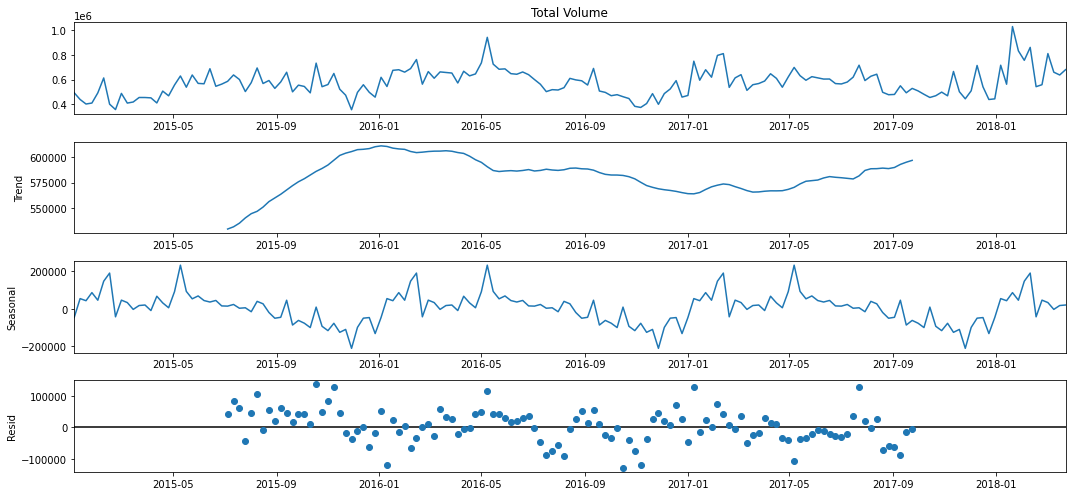

In [108]:
decomposed = seasonal_decompose(df_avocado_boston_ix['Total Volume'])
decomposed.plot();

In [109]:
test_results = adfuller(df_avocado_boston_all['Total Volume'])
alpha = 0.05
if test_results[1] <= alpha:
    print('Reject null hypothesis; The series doesn\'t have a unit root')
else:
    print('Failed to reject null hypothesis; The series has a unit root')

Reject null hypothesis; The series doesn't have a unit root


In [110]:
test_results_2 = kpss(df_avocado_boston_all['Total Volume'])
alpha = 0.05
if test_results_2[1] <= alpha:
    print('Reject null hypothesis; The series has a unit root')
else:
    print('Failed to reject null hypothesis; The series is stationary')

Failed to reject null hypothesis; The series is stationary


/home/idrishaidar/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/idrishaidar/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [111]:
arima_model = pmd.auto_arima(
    df_avocado_boston_ix['Total Volume'],
    d=0, start_p=0,
    start_q=0, trace=True,
    stationary=True
)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4402.800, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4346.262, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4368.255, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4970.453, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4340.384, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4333.729, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=4335.695, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4335.615, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4339.696, Time=0.17 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=4337.598, Time=0.39 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 1.582 seconds


In [112]:
model = ARIMA(df_avocado_boston_ix['Total Volume'], order=(3,0,0))
model_fit = model.fit()

/home/idrishaidar/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/idrishaidar/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided,

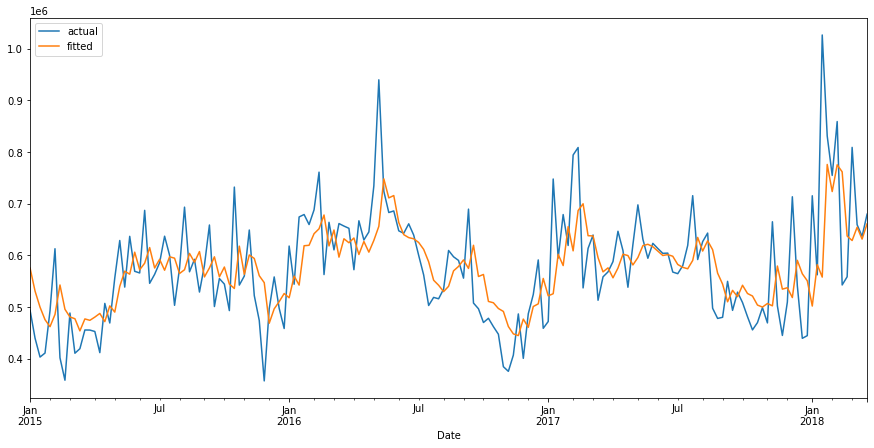

In [113]:
df_avocado_boston_ix['Total Volume'].plot(label='actual')
model_fit.fittedvalues.plot(label='fitted')
plt.legend()

In [114]:
# df_avocado_boston_all.groupby(['Year', 'Month'])['Date']

In [115]:
df_avocado_boston_all['Year'] = df_avocado_boston_all['Date'].dt.year
df_avocado_boston_all['Month'] = df_avocado_boston_all['Date'].dt.month
df_avocado_boston_all['Date_curr'] = df_avocado_boston_all['Date'].dt.day
df_avocado_boston_all['Week'] = df_avocado_boston_all['Date'].dt.isocalendar().week
df_avocado_boston_all

,Date,Total Volume,Total Volume_rolling_1mo,Year,Month,Date_curr,Week
0,2015-01-04,493930.13,NaN,2015,1,4,1
1,2015-01-11,439989.71,NaN,2015,1,11,2
2,2015-01-18,403540.67,NaN,2015,1,18,3
3,2015-01-25,411291.84,437188.0875,2015,1,25,4
4,2015-02-01,492965.99,436947.0525,2015,2,1,5
...,...,...,...,...,...,...,...
164,2018-02-25,558842.29,678931.7150,2018,2,25,8
165,2018-03-04,809079.36,692484.5000,2018,3,4,9
166,2018-03-11,659567.53,642618.2225,2018,3,11,10
167,2018-03-18,636987.33,666119.1275,2018,3,18,11


In [116]:
df_calendar_short = df_calendar[['date', 'holiday']]
df_calendar_short['date'] = pd.to_datetime(df_calendar_short['date'])
df_calendar_short

<ipython-input-116-fce7d79839a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar_short['date'] = pd.to_datetime(df_calendar_short['date'])


,date,holiday
0,1960-01-02,NaN
1,1960-01-03,NaN
2,1960-01-04,NaN
3,1960-01-05,NaN
4,1960-01-06,NaN
...,...,...
23995,2025-09-12,NaN
23996,2025-09-13,NaN
23997,2025-09-14,NaN
23998,2025-09-15,NaN


In [117]:
df_avocado_boston_all_dt = pd.merge(
    left=df_avocado_boston_all,
    right=df_calendar_short,
    left_on='Date',
    right_on='date',
    how='left'
)

df_avocado_boston_all_dt['holiday'].fillna('No holiday', inplace=True)

In [118]:
df_avocado_boston_all_dt

,Date,Total Volume,Total Volume_rolling_1mo,Year,Month,Date_curr,Week,date,holiday
0,2015-01-04,493930.13,NaN,2015,1,4,1,2015-01-04,No holiday
1,2015-01-11,439989.71,NaN,2015,1,11,2,2015-01-11,No holiday
2,2015-01-18,403540.67,NaN,2015,1,18,3,2015-01-18,No holiday
3,2015-01-25,411291.84,437188.0875,2015,1,25,4,2015-01-25,No holiday
4,2015-02-01,492965.99,436947.0525,2015,2,1,5,2015-02-01,No holiday
...,...,...,...,...,...,...,...,...,...
164,2018-02-25,558842.29,678931.7150,2018,2,25,8,2018-02-25,No holiday
165,2018-03-04,809079.36,692484.5000,2018,3,4,9,2018-03-04,No holiday
166,2018-03-11,659567.53,642618.2225,2018,3,11,10,2018-03-11,No holiday
167,2018-03-18,636987.33,666119.1275,2018,3,18,11,2018-03-18,No holiday


In [119]:
df_avo_train = df_avocado_boston_all_dt[df_avocado_boston_all_dt['Year'] < 2017]
df_avo_val = df_avocado_boston_all_dt[
    (df_avocado_boston_all_dt['Year'] == 2017) 
    & (df_avocado_boston_all_dt['Month'] <= 6)
]
df_avo_test = df_avocado_boston_all_dt[
    (df_avocado_boston_all_dt['Year'] >= 2017) 
    & (df_avocado_boston_all_dt['Month'] > 6)
]

X_train = df_avo_train[['Year', 'Month', 'Week', 'holiday']]
y_train = df_avo_train['Total Volume']

X_val = df_avo_val[['Year', 'Month', 'Week', 'holiday']]
y_val = df_avo_val['Total Volume']

X_test = df_avo_test[['Year', 'Month', 'Week', 'holiday']]
y_test = df_avo_test['Total Volume']

In [120]:
transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(handle_unknown='ignore'), ['Month', 'Week', 'holiday'])
], remainder='passthrough')

# encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = transformer.fit_transform(X_train)
X_val_encoded = transformer.transform(X_val)
X_test_encoded = transformer.transform(X_test)

In [121]:
X_train_encoded.shape

(104, 72)

In [122]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_encoded, y_train)
lin_reg.score(X_train_encoded, y_train)

0.560723248311007

In [123]:
y_pred_train = lin_reg.predict(X_train_encoded)
y_pred_train

array([492050.71249737, 530139.69469024, 514256.24829298, 508437.71791141,
       563491.59454229, 613083.63216649, 455502.2096518 , 484352.54407828,
       522672.41786939, 509241.79323542, 511181.03745206, 531488.16138302,
       455753.21118353, 528572.39892089, 493904.01268186, 549306.40867907,
       469428.97029535, 649025.61467265, 721520.55405504, 583858.54535174,
       634461.48634307, 569396.87770669, 577417.67973948, 676964.3477962 ,
       535841.97777341, 563540.01708508, 547059.40873265, 543154.5476097 ,
       532616.81889725, 482804.41939944, 528032.17897819, 624470.24312706,
       555860.87898023, 564357.61911254, 529298.47019097, 608258.43160632,
       556341.96405669, 471985.18247865, 555330.39647527, 484481.89496252,
       450757.79807848, 562866.41390257, 436687.2230753 , 440969.30843984,
       501137.07292166, 477614.22817996, 410608.31762968, 357429.61973457,
       483612.85536692, 547821.64596887, 497742.36344846, 458802.47265743,
       618251.15062639, 5